In [163]:
# Packages a importer
import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import sys
import glob
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import xarray as xr
import pandas as pd

In [164]:
# Repertoire ou le fichier se trouve
path_file='C:/Users/emman/OneDrive - UQAM/labo3code/imerg_pr_201911_3h.nc4'

In [165]:

# Nom de la variable
var_name='precipitationCal'

# Pour lire le fichier
print('Reading file: ',path_file)

Reading file:  C:/Users/emman/OneDrive - UQAM/labo3code/imerg_pr_201911_3h.nc4


In [166]:

ds_i = xr.open_dataset(path_file)

ds_i.close()
ds_i

<xarray.Dataset> Size: 6GB
Dimensions:           (time: 240, bnds: 2, lon: 3600, lat: 1800)
Coordinates:
  * time              (time) datetime64[ns] 2kB 2019-11-01 ... 2019-11-30T21:...
  * lon               (lon) float32 14kB -179.9 -179.9 -179.8 ... 179.9 179.9
  * lat               (lat) float32 7kB -89.95 -89.85 -89.75 ... 89.85 89.95
Dimensions without coordinates: bnds
Data variables:
    time_bnds         (time, bnds) datetime64[ns] 4kB ...
    precipitationCal  (time, lat, lon) float32 6GB ...
Attributes:
    CDI:          Climate Data Interface version 1.9.5 (http://mpimet.mpg.de/...
    history:      Mon Sep 27 17:58:00 2021: cdo --timestat_date first -L -f n...
    Conventions:  CF-1.6
    FileHeader:   DOI=10.5067/GPM/IMERG/3B-HH/06;\nDOIauthority=http://dx.doi...
    FileInfo:     DataFormatVersion=6a;\nTKCodeBuildVersion=0;\nMetadataVersi...
    GridHeader:   BinMethod=ARITHMETIC_MEAN;\nRegistration=CENTER;\nLatitudeR...
    CDO:          Climate Data Operators version 1.9.5 (http://mpimet.mpg.de/...

In [167]:
print('Reading file: DONE')
precipitation = ds_i[var_name]
time = ds_i['time']
lons = ds_i['lon']
lats = ds_i['lat']

Reading file: DONE


In [168]:
points_infos = {'Kuala Lumpur': {'lat': 3.1, 'lon': 101.6},
          "Montreal": {"lat": 45.5, 'lon': -73.5},
          "Point Oceanique": {"lat": 5.0, 'lon': 106.0},
          "Aoraki": {"lat": -43.6, 'lon': 170.1}
                }

Fonction qui calcule la distance en degrés des points à 50km d'une ville


In [169]:
def calcul_offset_lon_50km(lieu):

    lat = points_infos[lieu]['lat']
    lat_rad = np.radians(lat)

    offset_lon_degres = 50/(111 * np.cos(lat_rad))
    #points_a_50km = {lieu : {'lat': lat, 'lon': lon},
                     #f'{lieu}+50km à l est': {'lat': lat, 'lon': float(lon + diff_lon_degres)},
                     #f'{lieu}+50km à l ouest': {'lat': lat, 'lon': float(lon - diff_lon_degres)},
                     #f'{lieu}+50km au nord': {'lat': lat + diff_lat_degres, 'lon': lon},
                     #f'{lieu}+50km au sud': {'lat': lat - diff_lat_degres, 'lon': lon}
    #}
    return offset_lon_degres


2. Trouver le point de grille le plus proche du lieu

In [170]:
#Initialiser un dictionnaire contenant les séries de précipitations pour chaque ville
precip_par_ville = {}

for lieu, infos in points_infos.items():
    taux_precip_3h = precipitation.sel(
        lat=infos['lat'],
        lon=infos['lon'],
        method='nearest'
    )
    precip_par_ville[lieu] = taux_precip_3h
    # coordonnées utilisées
    lat_utilisee = taux_precip_3h['lat'].values
    lon_utilisee = taux_precip_3h['lon'].values

    print(f'Point de grille le plus près de {lieu} : {lat_utilisee:.2f}°N, {lon_utilisee:.2f}°E')



Point de grille le plus près de Kuala Lumpur : 3.05°N, 101.55°E
Point de grille le plus près de Montreal : 45.55°N, -73.45°E
Point de grille le plus près de Point Oceanique : 5.05°N, 106.05°E
Point de grille le plus près de Aoraki : -43.55°N, 170.15°E


Regrouper toutes les valeurs dans une liste pour pouvoir déterminer le maximum

In [171]:
toutes_valeurs = [s.values for s in precip_par_ville.values()]
toutes_valeurs

[array([0.00000000e+00, 0.00000000e+00, 2.84158718e-02, 1.78334072e-01,
        3.30159962e-02, 0.00000000e+00, 2.34123878e-03, 0.00000000e+00,
        0.00000000e+00, 4.04367983e-01, 2.59076500e+00, 1.74310565e+00,
        1.24730341e-01, 0.00000000e+00, 1.85764551e-01, 1.37141533e-02,
        0.00000000e+00, 0.00000000e+00, 4.43099171e-01, 6.44415379e-01,
        3.91272977e-02, 9.89122212e-01, 7.28423819e-02, 1.14824914e-03,
        1.49518717e-03, 2.36489201e+00, 2.04337859e+00, 4.57269996e-01,
        7.81473890e-02, 1.85887073e-03, 3.06963343e-02, 0.00000000e+00,
        0.00000000e+00, 1.22675315e-01, 1.62985876e-01, 1.60993075e+00,
        2.53487796e-01, 4.26427042e-03, 1.46854008e-02, 0.00000000e+00,
        0.00000000e+00, 4.75657672e-01, 1.90556204e+00, 3.49203497e-01,
        6.12828195e-01, 0.00000000e+00, 9.62930620e-02, 8.24680105e-02,
        4.84399279e-05, 1.13390720e+00, 6.66055441e+00, 1.61583078e+00,
        9.47964489e-01, 0.00000000e+00, 7.11005688e+00, 1.230307

Déterminer le maximum et le minimum de précipitations sur tous les lieux et toute la période pour avoir une plage de données uniforme

In [173]:
precip_min = min([v.min() for v in toutes_valeurs])
print(precip_min)
precip_max = max([v.max() for v in toutes_valeurs])
print(precip_max)

0.0
36.58017


2. Tracer les graphiques de variation du taux de précipitation pour chaque ville

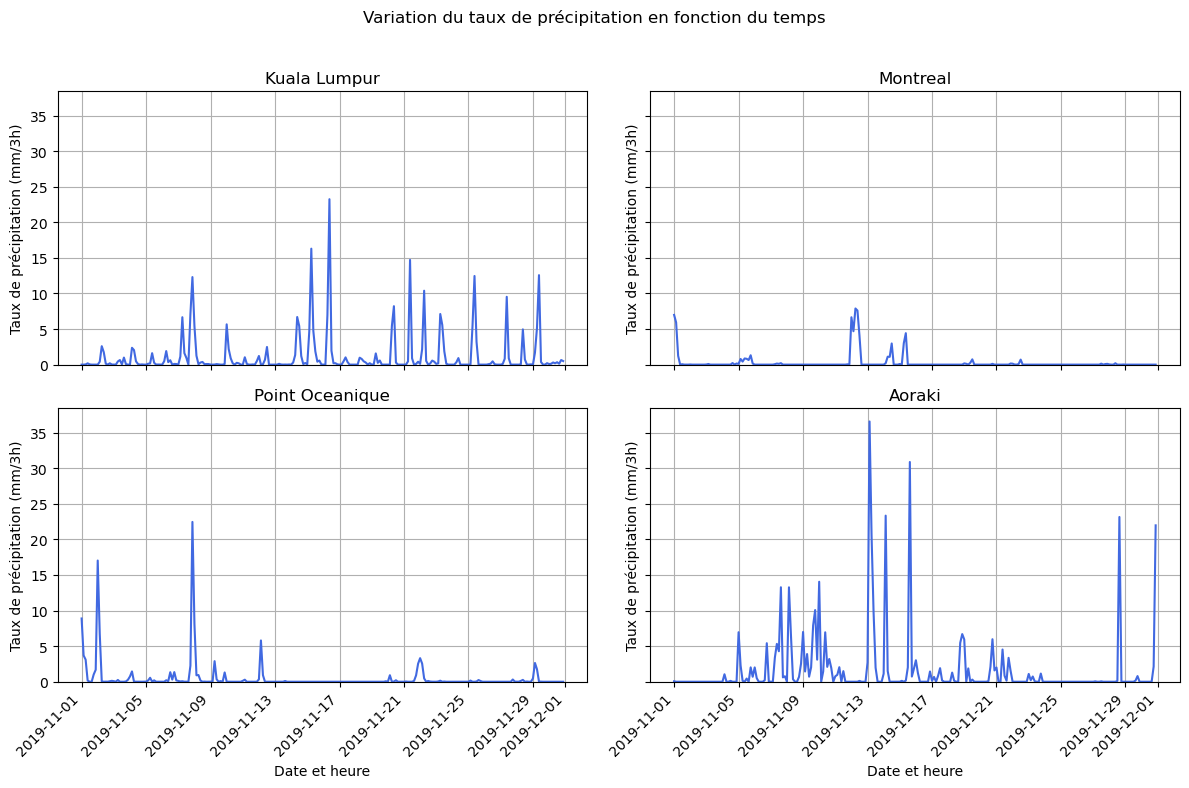

In [174]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)
axs = axs.flatten()

for i, (name, data) in enumerate(precip_par_ville.items()):
    axs[i].plot(data['time'].values, data.values, label=name, color='royalblue')
    axs[i].set_title(name)
    axs[i].set_ylim(precip_min, precip_max*1.05)
    axs[i].set_ylabel("Taux de précipitation (mm/3h)")
    axs[i].set_xlabel("Date et heure")
    axs[i].grid(True)

# Incliner les dates à 45°
fig.autofmt_xdate(rotation=45)

plt.suptitle("Variation du taux de précipitation en fonction du temps")
plt.tight_layout(rect=(0, 0, 1, 0.96))
plt.savefig('2_var_taux_precip_pr_temps.png')
plt.show()


3. Calculer les quantités à mettre dans le tableau

In [175]:
stat_precip = {'Kuala Lumpur':{},
               'Montreal': {},
               'Point Oceanique': {},
               'Aoraki': {}
               }

for lieu in precip_par_ville.keys():
    # a) accumulation totale
    accumulation_totale = float(precip_par_ville[lieu].values.sum())
    #b) nombre de mesures supérieures à 0 et frequence de precipitation
    nb_positifs = (precip_par_ville[lieu]>0).sum().values

    freq = nb_positifs/len(precip_par_ville[lieu])
    #c) precipitation moyenne et intensité de precipitation moyenne
    precip_moyenne = accumulation_totale/len(precip_par_ville[lieu])
    intensite_precip_moyenne = accumulation_totale/nb_positifs

    #d) Durée maximale d'un événement
    # Série booléenne : True si précipitation > 0
    pluie = (precip_par_ville[lieu]>0)
    # Convertir en tableau numpy
    pluie = np.array(pluie, dtype=int)

    # On repère les transitions et groupe les True
    groupes = np.split(pluie, np.where(np.diff(pluie) != 0)[0] + 1)
    # Filtrer les groupes de pluie (valeurs == 1)
    longueurs = [len(g) for g in groupes if g[0] == 1]

    # Durée maximale en heures
    duree_max = max(longueurs, default=0) * 3

    #e) valeur maximale du taux de précipitation
    intensite_max = precip_par_ville[lieu].values.max()

    stat_precip[lieu]['Accumulation totale [mm]'] = round(accumulation_totale, 2)
    stat_precip[lieu]['Nombre de mesures > 0 mm'] = nb_positifs
    stat_precip[lieu]['Fréquence de précipitation'] = round(freq, 3)
    stat_precip[lieu]['Précipitation moyenne [mm/3h]'] = round(precip_moyenne, 2)
    stat_precip[lieu]['Intensité de précipitation moyenne [mm/3h]'] = round(intensite_precip_moyenne, 2)
    stat_precip[lieu]["Durée maximale d'un événement [h]"] = duree_max
    stat_precip[lieu]["Intensité maximale de précipitation [mm/3h]"] = intensite_max

3.f. Calculer le coefficient de corrélation de Pearson

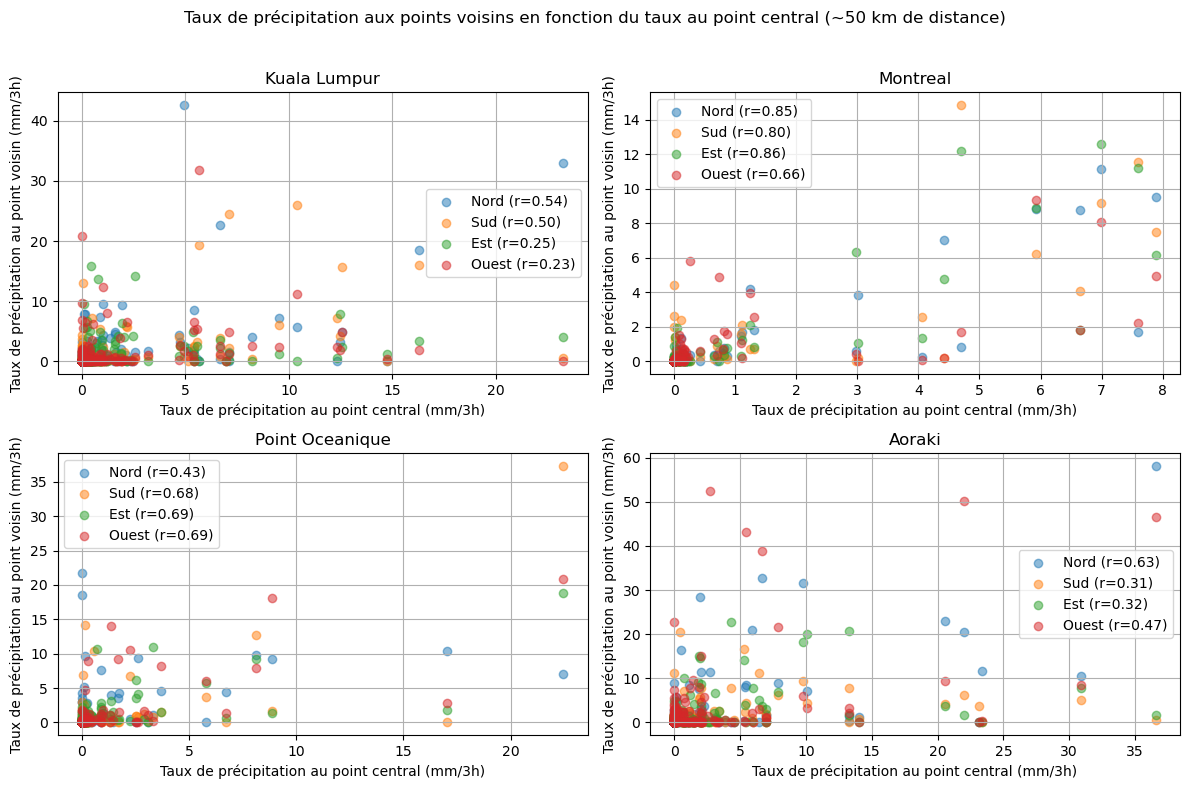

       Kuala Lumpur  Montreal  Point Oceanique    Aoraki
Nord       0.542455  0.850448         0.426702  0.634770
Sud        0.504424  0.800983         0.675374  0.307716
Est        0.245945  0.862969         0.692981  0.323156
Ouest      0.234487  0.663105         0.691033  0.473284


In [179]:
correlations = {}

# Tracer les nuages de points
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()

for i, (lieu, infos) in enumerate(points_infos.items()):
    offset_lon_degres = calcul_offset_lon_50km(lieu)
    offset_lat_degres = 50/111


    lat, lon = infos['lat'], infos['lon']
    pt_original = precipitation.sel(lat=lat, lon=lon, method='nearest')

    voisins = {
        'Nord': precipitation.sel(lat=lat + offset_lat_degres, lon=lon, method='nearest'),
        'Sud': precipitation.sel(lat=lat - offset_lat_degres, lon=lon, method='nearest'),
        'Est': precipitation.sel(lat=lat, lon=lon + offset_lon_degres, method='nearest'),
        'Ouest': precipitation.sel(lat=lat, lon=lon - offset_lon_degres, method='nearest')
        }

    correlations[lieu] = {}

    for direction, precip in voisins.items():
        # Corrélation de Pearson
        r = np.corrcoef(pt_original, precip)[0, 1]
        correlations[lieu][direction] = r
        stat_precip[lieu][f'Coeff. Pearson 50km vers la direction {direction}'] = round(r, 2)
        #Nuage de points

        axs[i].scatter(pt_original, precip, alpha=0.5, label=f"{direction} (r={r:.2f})")

    axs[i].set_title(lieu)
    axs[i].set_xlabel("Taux de précipitation au point central (mm/3h)")
    axs[i].set_ylabel("Taux de précipitation au point voisin (mm/3h)")
    axs[i].legend()
    axs[i].grid(True)

plt.suptitle("Taux de précipitation aux points voisins en fonction du taux au point central (~50 km de distance)")
plt.tight_layout(rect=(0, 0, 1, 0.96))
plt.savefig('3f_correlation_pearson.png')
plt.show()

df_corr = pd.DataFrame(correlations)
print(df_corr)


Affichage du tableau pour le numero 3

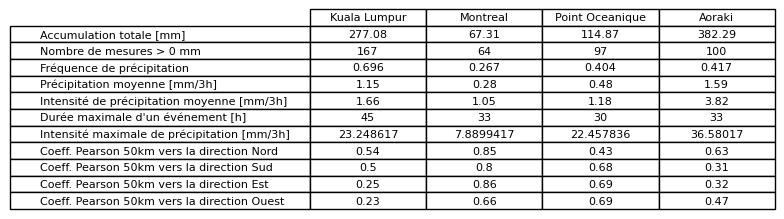

In [177]:
df_precip = pd.DataFrame(stat_precip)
# Création de la figure
fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('off')

# Ajout du tableau
table = ax.table(cellText=df_precip.values,
                 rowLabels=df_precip.index,
                 colLabels=df_precip.columns,
                 loc='center',
                 cellLoc='center')
# Sauvegarde en image
plt.savefig("3_tableau_precip.png", bbox_inches='tight', dpi=300)
print(table)


4. Faire le profil journalier des précipitations

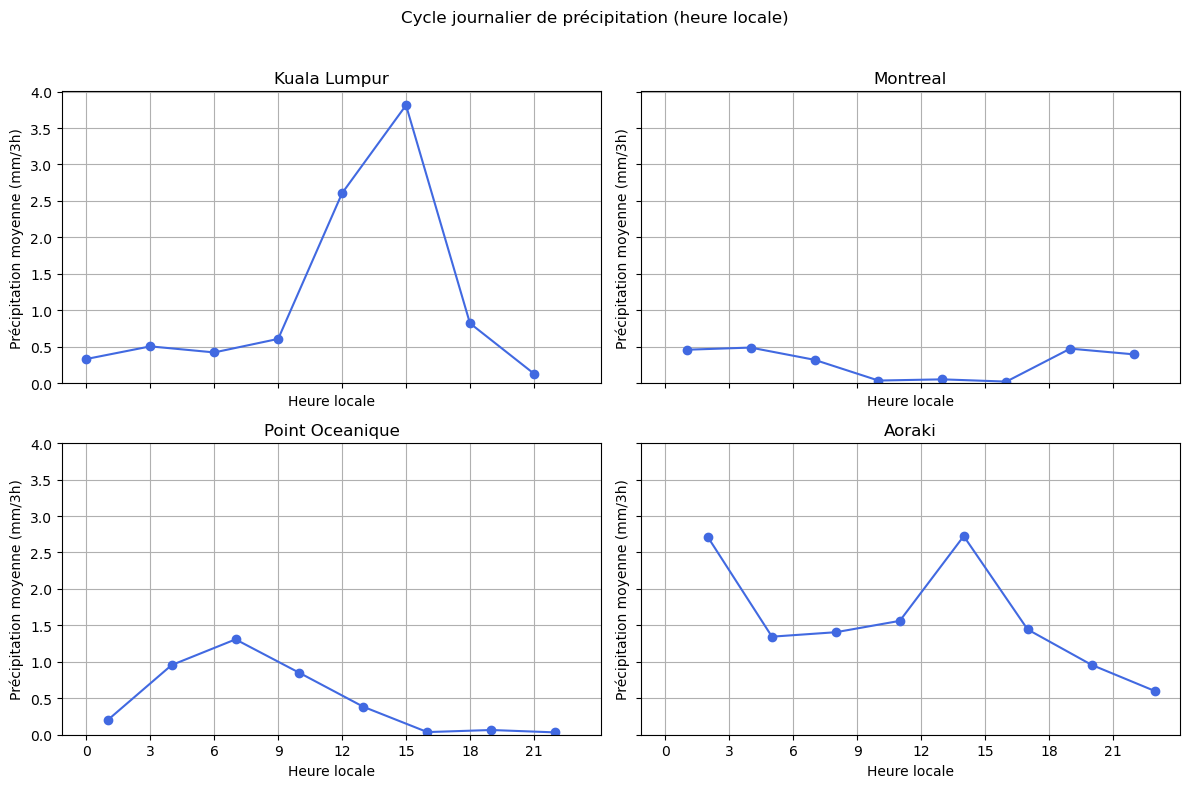

In [178]:

# Dictionnaire pour les profils
profils = {}

for lieu, infos in points_infos.items():
    lat, lon = infos['lat'], infos['lon']
    # La terre tourne de 360 degrés en 24h donc le décalage est de 1h pour 15 degrés de longitude
    decalage_horaire = lon/15

    precip_par_ville[lieu] = precipitation.sel(lat=lat, lon=lon, method='nearest')

    # Calculer l'heure locale
    heure_locale = precip_par_ville[lieu]['time'] + pd.Timedelta(hours=decalage_horaire)
    precip_par_ville[lieu].coords['heure locale'] = ('time', heure_locale.data)

    moyennes_par_heure= precip_par_ville[lieu].groupby('heure locale.hour').mean()
    profils[lieu] = moyennes_par_heure

# Déterminer l’échelle commune
all_values = [p.values for p in profils.values()]
vmin = 0
vmax = max([v.max() for v in all_values]) * 1.05

# Tracer les courbes
fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)
axs = axs.flatten()

for i, (lieu, profile) in enumerate(profils.items()):
    axs[i].plot(profile['hour'], profile.values, marker='o', color='royalblue')
    axs[i].set_title(lieu)
    axs[i].set_xlabel("Heure locale")
    axs[i].set_ylabel("Précipitation moyenne (mm/3h)")
    axs[i].set_ylim(vmin, vmax)
    axs[i].grid(True)
    axs[i].set_xticks(range(0, 24, 3))

plt.suptitle("Cycle journalier de précipitation (heure locale)")
plt.tight_layout(rect=(0, 0, 1, 0.96))
plt.savefig('4_cycle_journalier_precip.png')
plt.show()

Analyse des champs spatiaux

1. Distribution spatiale globale du taux de précipitation au 1er novembre 2019

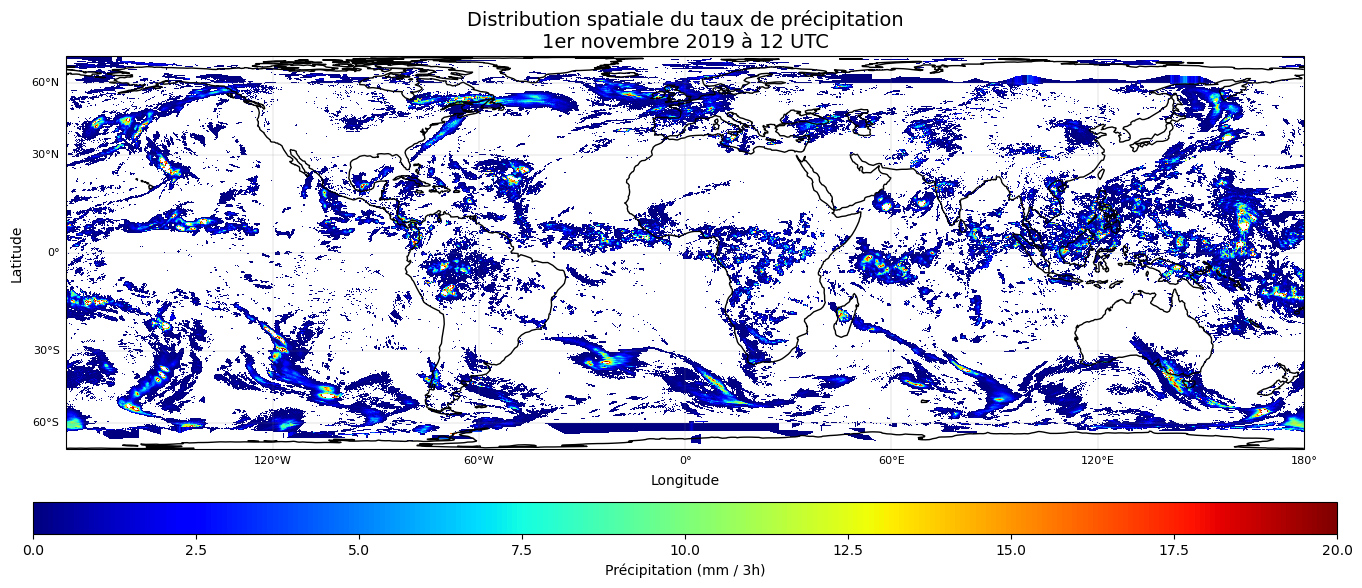

In [180]:
# Sélectionner les données au pas de temps désiré
precip_12utc_201991101 = precipitation.sel(time='2019-11-01T12:00:00')

# Prendre uniquement les valeurs de l'intervalle de précipitation voulu
donnes_utilisees = precip_12utc_201991101.where((precip_12utc_201991101 > 0) & (precip_12utc_201991101 <= 20))

# Assigner les données de latitude et longitude
lon = donnes_utilisees['lon']
lat = donnes_utilisees['lat']
precip = donnes_utilisees.values

#Créer la carte
fig = plt.figure(figsize=(14, 6))
ax = plt.axes(projection=ccrs.LambertCylindrical())

# Tracer la précipitation avec pcolormesh
mesh = ax.pcolormesh(lon, lat, precip, transform=ccrs.PlateCarree(),
                     cmap='jet', shading='auto', vmin=0, vmax=20)
# Ajouter les côtes
ax.coastlines()

# Ajouter les axes de latitude/longitude
gl = ax.gridlines(draw_labels=True, linewidth=0.3, color='gray', alpha=0.5)
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8}
ax.text(0.5, -0.08, "Longitude", transform=ax.transAxes,
        ha='center', va='center', fontsize=10)
ax.text(-0.04, 0.5, "Latitude", transform=ax.transAxes,
        ha='center', va='center', rotation='vertical', fontsize=10)



# Ajouter la barre des couleurs
cbar = plt.colorbar(mesh, orientation='horizontal', pad=0.1, aspect=40)
cbar.set_label("Précipitation (mm / 3h)")

# Titre
plt.title("Distribution spatiale du taux de précipitation\n1er novembre 2019 à 12 UTC", fontsize=14)
plt.tight_layout()
plt.savefig('1_distrib_spatiale_globale_20191101_12UTC.png')
plt.show()


2. Histogramme du nombre de valeurs par classe d'intensité le 1er novembre a 12 UTC

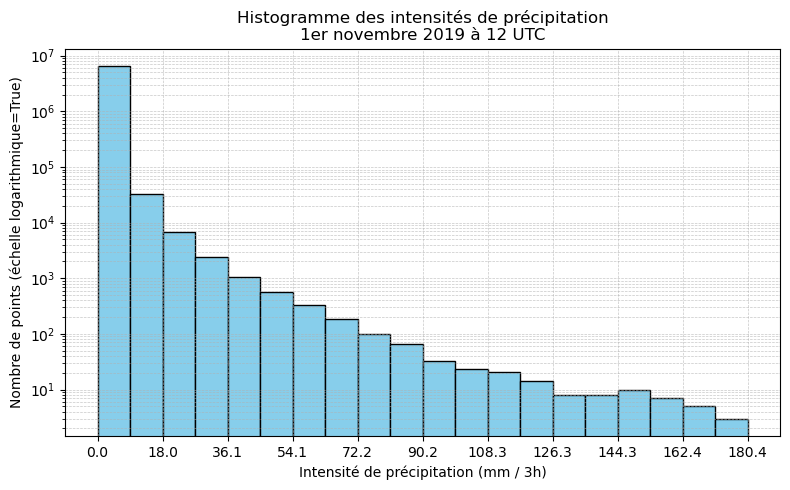

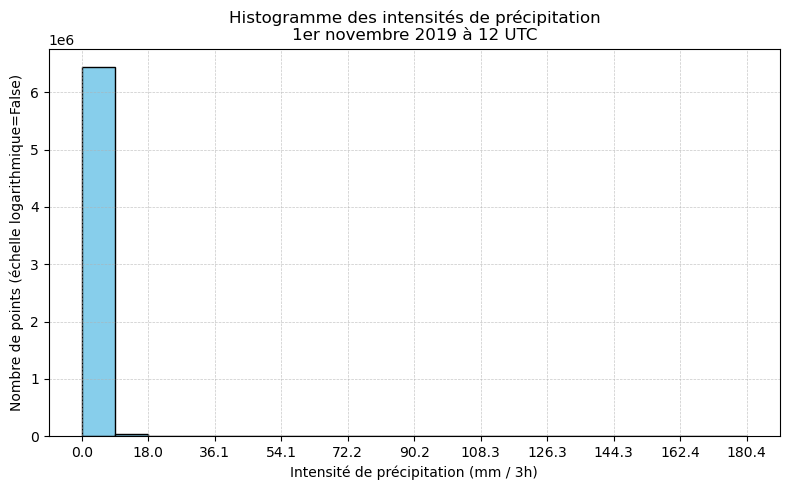

In [181]:
#Transformer le tableau en 1 dimension (liste)
liste_valeurs = precip_12utc_201991101.values.flatten()

# Définir les bornes
precip_max = liste_valeurs.max()
bornes = np.linspace(0, precip_max, 21)

#Créer l'histogramme (un a echelle log, l'autre non)
for valeur in [True, False]:
    plt.figure(figsize=(8, 5))
    plt.hist(liste_valeurs, bins=bornes, color='skyblue', edgecolor='black', log=valeur)

    # Aligner les xtixks avec les bornes
    ticks = bornes[::2]
    plt.xticks(ticks)

    # Ajouter les labels
    plt.xlabel("Intensité de précipitation (mm / 3h)")
    plt.ylabel(f"Nombre de points (échelle logarithmique={valeur})")
    plt.title("Histogramme des intensités de précipitation\n1er novembre 2019 à 12 UTC")

    plt.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.savefig(f'2_histogramme_intensites_20191101_12UTC_log_{valeur}.png')
    plt.show()


3. Carte du taux de précipitation moyen sur tout le mois

In [183]:
# Faire la moyenne sur le mois pour chaque point
moyenne_mensuelle = precipitation.mean(dim='time')

# Enlever les valeurs de plus de 5mm/3h
donnees_filtrees = moyenne_mensuelle.where((moyenne_mensuelle > 0)&(moyenne_mensuelle <= 5))

# Extraire les coordonnées
lon = donnees_filtrees['lon']
lat = donnees_filtrees['lat']
precip = donnees_filtrees.values

# Créer la figure
fig = plt.figure(figsize=(14, 6))
ax = plt.axes(projection=ccrs.LambertCylindrical())

# Tracer la précipitation avec pcolormesh
mesh = ax.pcolormesh(lon, lat, precip, transform=ccrs.PlateCarree(),
                     cmap='jet', shading='auto', vmin=0, vmax=5)
# Ajouter les côtes
ax.coastlines()

# Ajouter les axes de latitude/longitude
gl = ax.gridlines(draw_labels=True, linewidth=0.3, color='gray', alpha=0.5)
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8}
ax.text(0.5, -0.08, "Longitude", transform=ax.transAxes,
        ha='center', va='center', fontsize=10)
ax.text(-0.04, 0.5, "Latitude", transform=ax.transAxes,
        ha='center', va='center', rotation='vertical', fontsize=10)

# Ajouter la barre des couleurs
cbar = plt.colorbar(mesh, orientation='horizontal', pad=0.1, aspect=40)
cbar.set_label("Précipitation (mm / 3h)")

# Titre
plt.title("Distribution spatiale du taux de précipitation moyen [mm/3h]\nNovembre 2019", fontsize=14)
plt.tight_layout()
plt.savefig('3_distrib_spatiale_globale_moyenne_201911.png')
plt.show()


MemoryError: Unable to allocate 5.79 GiB for an array with shape (240, 1800, 3600) and data type float32

4. Histogramme du nombre de points par classe d'intensité de taux de précipitation moyen sur tout le mois de novembre

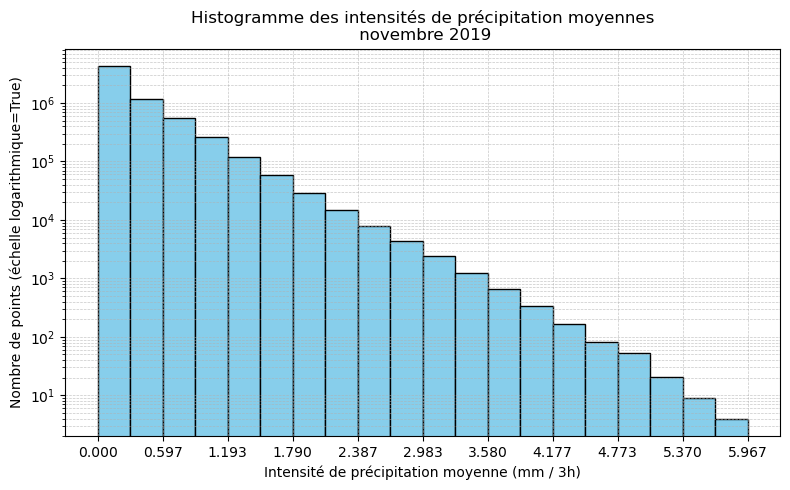

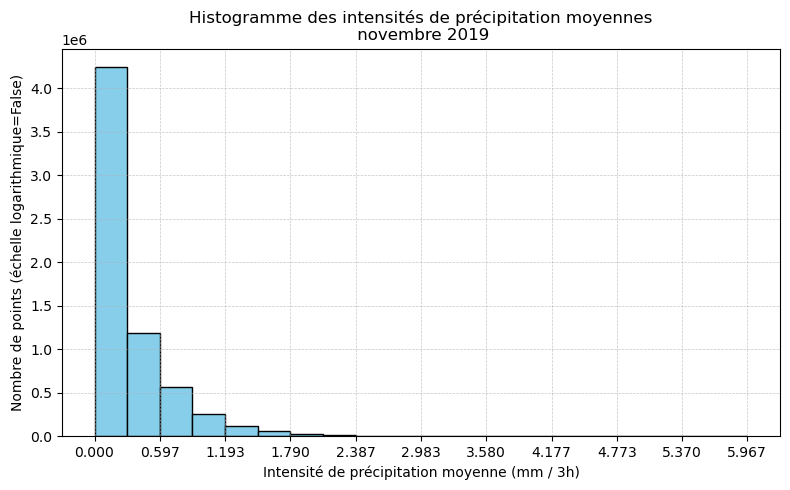

In [159]:
#Transformer le tableau en 1 dimension (liste)
liste_valeurs = moyenne_mensuelle.values.flatten()

# Définir les bornes
precip_max = liste_valeurs.max()
bornes = np.linspace(0, precip_max, 21)

#Créer l'histogramme
for valeur in [True, False]:
    plt.figure(figsize=(8, 5))
    plt.hist(liste_valeurs, bins=bornes, color='skyblue', edgecolor='black', log=valeur)

    # ALigner les xticks aux bornes
    ticks = bornes[::2]
    plt.xticks(ticks)

    # Ajouter les labels
    plt.xlabel("Intensité de précipitation moyenne (mm / 3h)")
    plt.ylabel(f"Nombre de points (échelle logarithmique={valeur})")
    plt.title("Histogramme des intensités de précipitation moyennes\n novembre 2019")

    plt.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.savefig(f'4_histogramme_taux_moyen_201911_log_{valeur}.png')
    plt.show()

5. Distribution spatiale du taux de précipitations moyenné sur le mois autour de Montréal (pcolormesh)

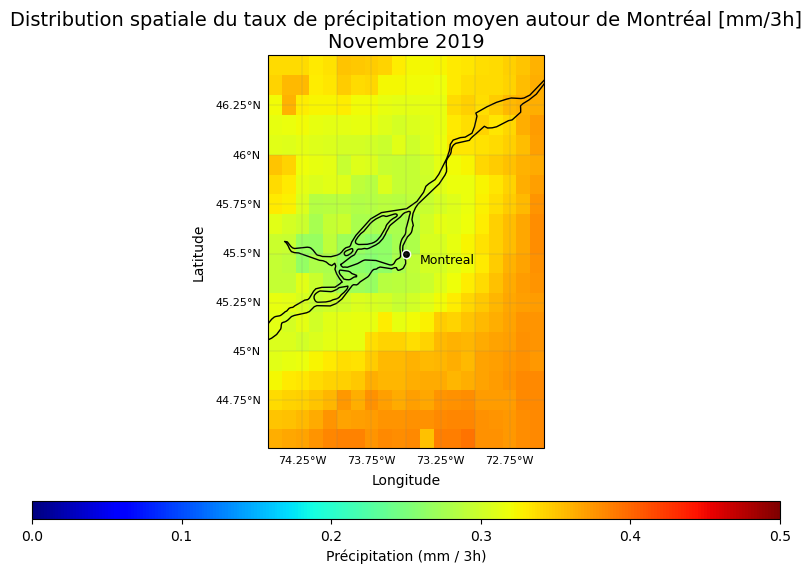

In [184]:
# Extraire les coordonnées de Montréal
lat_montreal = points_infos['Montreal']['lat']
lon_montreal = points_infos['Montreal']['lon']

# Sélectionner la région de Montréal
region = precipitation.sel(
    lat=slice(lat_montreal-1, lat_montreal+1),
    lon=slice(lon_montreal-1, lon_montreal+1)
)
moyenne_mensuelle_montreal = region.sel(time='2019-11').mean(dim='time')

# Extraire les données
lon = moyenne_mensuelle_montreal['lon']
lat = moyenne_mensuelle_montreal['lat']
precip_moyenne_mtl = moyenne_mensuelle_montreal.values

# Tracer la carte
fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent([lon_montreal-1, lon_montreal+1, lat_montreal-1, lat_montreal+1], crs=ccrs.PlateCarree())

# Tracer la précipitation avec pcolormesh
mesh = ax.pcolormesh(lon, lat, precip_moyenne_mtl, transform=ccrs.PlateCarree(),
                     cmap='jet', shading='auto', vmin=0, vmax=0.5)
# Ajouter les côtes
ax.coastlines(resolution='10m')

# Ajouter un point à la position de Montréal
ax.plot(lon_montreal, lat_montreal, marker='o', color='black', markersize=6,
        markeredgecolor='white', transform=ccrs.PlateCarree(), label="Montreal")
#Ajouter l'étiquette Montréal au point
ax.text(lon_montreal + 0.1, lat_montreal, "Montreal", transform=ccrs.PlateCarree(),
        fontsize=9, color='black', ha='left', va='top')

# Ajouter les axes de latitude/longitude
gl = ax.gridlines(draw_labels=True, linewidth=0.3, color='gray', alpha=0.5)
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8}
ax.text(0.5, -0.08, "Longitude", transform=ax.transAxes,
        ha='center', va='center', fontsize=10)
ax.text(-0.25, 0.5, "Latitude", transform=ax.transAxes,
        ha='center', va='center', rotation='vertical', fontsize=10)

# Ajouter la barre des couleurs
cbar = plt.colorbar(mesh, orientation='horizontal', pad=0.1, aspect=40)
cbar.set_label("Précipitation (mm / 3h)")

# Titre
plt.title("Distribution spatiale du taux de précipitation moyen autour de Montréal [mm/3h]\nNovembre 2019", fontsize=14)
plt.tight_layout()
plt.savefig('5_distrib_spatiale_taux_moyen_montreal_pcolormesh.png')
plt.show()

6. Distribution spatiale du taux de précipitations moyenné sur le mois autour de Montréal (contourf)

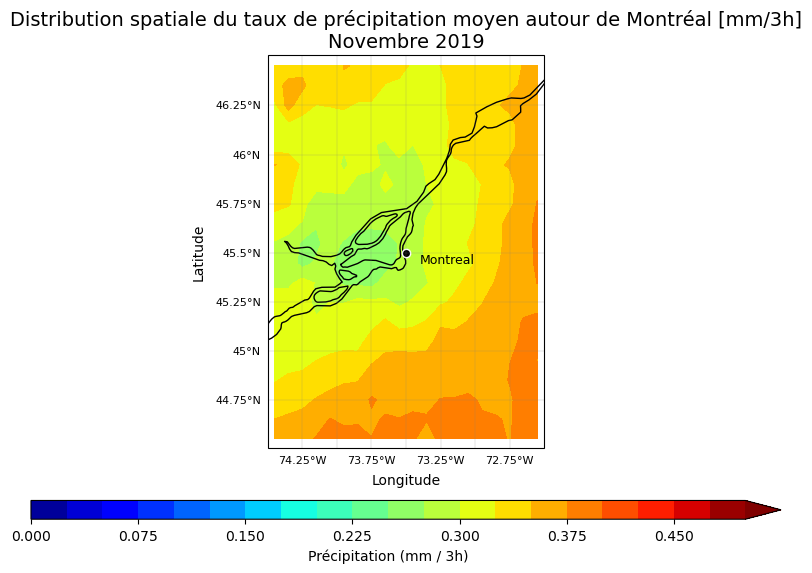

In [185]:
# Créer la figure
fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent([lon_montreal-1, lon_montreal+1, lat_montreal-1, lat_montreal+1], crs=ccrs.PlateCarree())

# Définir les niveaux de contour
levels = np.linspace(0, 0.5, 21)

# Tracer les contours
contour = ax.contourf(lon, lat, precip_moyenne_mtl, levels=levels,
                      transform=ccrs.PlateCarree(), cmap='jet', extend='max')

# Ajouter les côtes
ax.coastlines(resolution='10m')

# Ajouter un point à la position de Montréal
ax.plot(lon_montreal, lat_montreal, marker='o', color='black', markersize=6,
        markeredgecolor='white', transform=ccrs.PlateCarree(), label="Montreal")
#Ajouter l'étiquette Montréal au point
ax.text(lon_montreal + 0.1, lat_montreal, "Montreal", transform=ccrs.PlateCarree(),
        fontsize=9, color='black', ha='left', va='top')

# Ajouter les grilles
gl = ax.gridlines(draw_labels=True, linewidth=0.3, color='gray', alpha=0.5)
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8}
ax.text(0.5, -0.08, "Longitude", transform=ax.transAxes,
        ha='center', va='center', fontsize=10)
ax.text(-0.25, 0.5, "Latitude", transform=ax.transAxes,
        ha='center', va='center', rotation='vertical', fontsize=10)

# Ajouter la barre des couleurs
cbar = plt.colorbar(contour, orientation='horizontal', pad=0.1, aspect=40)
cbar.set_label("Précipitation (mm / 3h)")

# Titre
plt.title("Distribution spatiale du taux de précipitation moyen autour de Montréal [mm/3h]\nNovembre 2019", fontsize=14)
plt.tight_layout()
plt.savefig('6_distrib_spatiale_taux_moyen_montreal_contourf.png')
plt.show()


Figures bonus : Distribution spatiale du taux de précipitations moyenné sur le mois autour de Aoraki (pcolormesh)


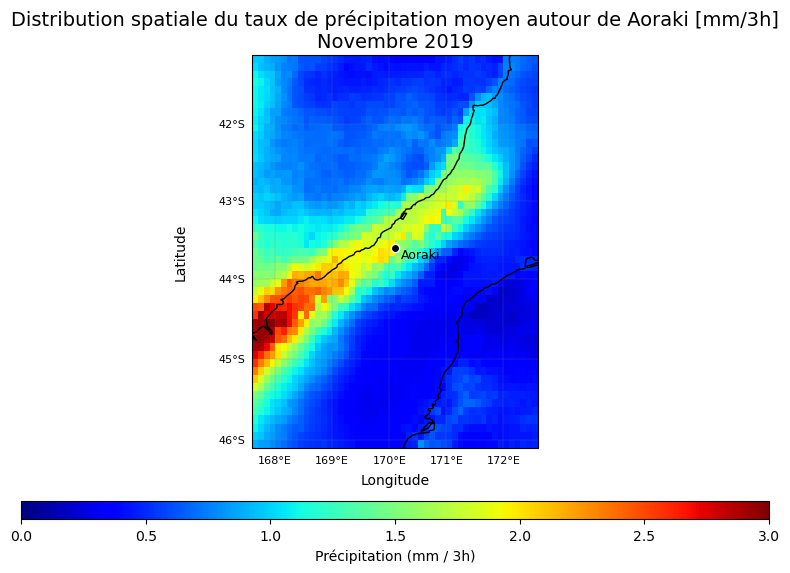

In [145]:
# Extraire les coordonnées de Aoraki
lat_aoraki = points_infos['Aoraki']['lat']
lon_aoraki = points_infos['Aoraki']['lon']

# Sélectionner la région de Aoraki
region = precipitation.sel(
    lat=slice(lat_aoraki-2.5, lat_aoraki+2.5),
    lon=slice(lon_aoraki-2.5, lon_aoraki+2.5)
)
moyenne_mensuelle_aoraki = region.sel(time='2019-11').mean(dim='time')

# Extraire les données
lon = moyenne_mensuelle_aoraki['lon']
lat = moyenne_mensuelle_aoraki['lat']
precip_moyenne_aoraki = moyenne_mensuelle_aoraki.values

# Tracer la carte
fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent([lon_aoraki-2.5, lon_aoraki+2.5, lat_aoraki-2.5, lat_aoraki+2.5], crs=ccrs.PlateCarree())

# Tracer la précipitation avec pcolormesh
mesh = ax.pcolormesh(lon, lat, precip_moyenne_aoraki, transform=ccrs.PlateCarree(),
                     cmap='jet', shading='auto', vmin=0, vmax=3)
# Ajouter les côtes
ax.coastlines(resolution='10m')

# Ajouter un point à la position d’Aoraki
ax.plot(lon_aoraki, lat_aoraki, marker='o', color='black', markersize=6,
        markeredgecolor='white', transform=ccrs.PlateCarree(), label="Aoraki")
#Ajouter l'étiquette Aoraki au point
ax.text(lon_aoraki + 0.1, lat_aoraki, "Aoraki", transform=ccrs.PlateCarree(),
        fontsize=9, color='black', ha='left', va='top')

# Ajouter les axes de latitude/longitude
gl = ax.gridlines(draw_labels=True, linewidth=0.3, color='gray', alpha=0.5)
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8}
ax.text(0.5, -0.08, "Longitude", transform=ax.transAxes,
        ha='center', va='center', fontsize=10)
ax.text(-0.25, 0.5, "Latitude", transform=ax.transAxes,
        ha='center', va='center', rotation='vertical', fontsize=10)

# Ajouter la barre des couleurs
cbar = plt.colorbar(mesh, orientation='horizontal', pad=0.1, aspect=40)
cbar.set_label("Précipitation (mm / 3h)")

# Titre
plt.title("Distribution spatiale du taux de précipitation moyen autour de Aoraki [mm/3h]\nNovembre 2019", fontsize=14)
plt.tight_layout()
plt.show()

Figures bonus : Distribution spatiale du taux de précipitations moyenné sur le mois autour de Aoraki (contourf)


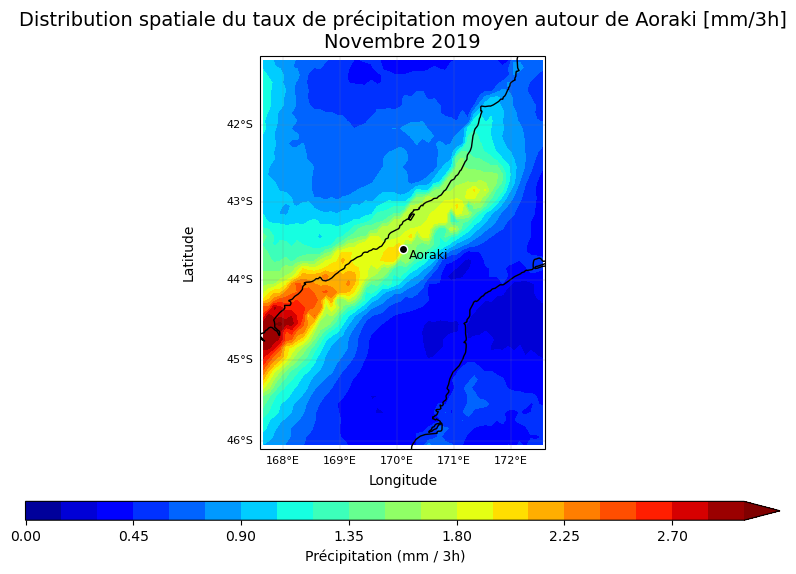

In [146]:
# Tracer la carte
fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent([lon_aoraki-2.5, lon_aoraki+2.5, lat_aoraki-2.5, lat_aoraki+2.5], crs=ccrs.PlateCarree())

# Définir les niveaux de contour
levels = np.linspace(0, 3, 21)

# Tracer les contours
contour = ax.contourf(lon, lat, precip_moyenne_aoraki, levels=levels,
                      transform=ccrs.PlateCarree(), cmap='jet', extend='max')
# Ajouter les côtes
ax.coastlines(resolution='10m')

# Ajouter un point à la position d’Aoraki
ax.plot(lon_aoraki, lat_aoraki, marker='o', color='black', markersize=6,
        markeredgecolor='white', transform=ccrs.PlateCarree(), label="Aoraki")
#Ajouter l'étiquette Aoraki au point
ax.text(lon_aoraki + 0.1, lat_aoraki, "Aoraki", transform=ccrs.PlateCarree(),
        fontsize=9, color='black', ha='left', va='top')


# Ajouter les axes de latitude/longitude
gl = ax.gridlines(draw_labels=True, linewidth=0.3, color='gray', alpha=0.5)
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8}
ax.text(0.5, -0.08, "Longitude", transform=ax.transAxes,
        ha='center', va='center', fontsize=10)
ax.text(-0.25, 0.5, "Latitude", transform=ax.transAxes,
        ha='center', va='center', rotation='vertical', fontsize=10)

# Ajouter la barre des couleurs
cbar = plt.colorbar(contour, orientation='horizontal', pad=0.1, aspect=40)
cbar.set_label("Précipitation (mm / 3h)")

# Titre
plt.title("Distribution spatiale du taux de précipitation moyen autour de Aoraki [mm/3h]\nNovembre 2019", fontsize=14)
plt.tight_layout()
plt.savefig('bonus1_distrib_spatiale_aoraki.png')
plt.show()

Figure bonus: Précipitation totale sur le mois de novembre en fonction de la longitude, à la latitude d'Aoraki

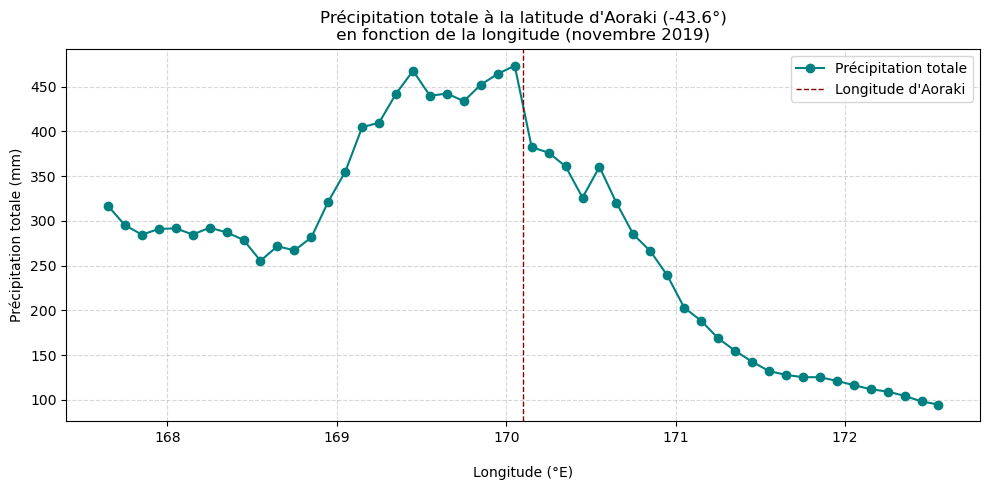

In [147]:
#   Faire la somme des précipitations pour tous les points de la région concernée
precip_lat = precipitation.sel(lat=lat_aoraki, method='nearest')

precip_total_region = precip_lat.sel(lon=slice(lon_aoraki - 2.5, lon_aoraki + 2.5)).sum(dim='time')

# Extraire les longitudes et les valeurs
longitudes = precip_total_region['lon']
precip_values = precip_total_region.values

# Tracer le graphique
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(longitudes, precip_values, marker='o', linestyle='-', color='teal', label = "Précipitation totale")
# Ligne verticale pointillée à la longitude d’Aoraki
ax.axvline(x=lon_aoraki, color='darkred', linestyle='--', linewidth=1, label="Longitude d'Aoraki")


#ax.text(lon_aoraki, ax.get_ylim()[0] - 0.05 * (ax.get_ylim()[1] - ax.get_ylim()[0]),
        #f"Aoraki : {lon_aoraki:.2f}", ha='center', va='top', fontsize=9, color='darkred')


plt.xlabel("Longitude (°E)", labelpad=15)
plt.ylabel("Précipitation totale (mm)")
plt.title(f"Précipitation totale à la latitude d'Aoraki ({lat_aoraki}°)\n en fonction de la longitude (novembre 2019) ")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.savefig('bonus2_distrib_latitudinale_aoraki.png')
plt.show()
